### ***Contexto del Negocio*** 📈
En la industria de las telecomunicaciones, la adquisición de nuevos clientes es mucho más costosa que la retención de los existentes. La "fuga de clientes" o "churn" se refiere al fenómeno por el cual los clientes cancelan su suscripción.

Identificar de manera proactiva a los clientes que tienen una alta probabilidad de abandonar la compañía nos permite tomar acciones de retención específicas (como ofertas, descuentos o soporte personalizado), reduciendo así la pérdida de ingresos y mejorando la lealtad del cliente.

### ***Objetivo del Proyecto*** 🎯
El objetivo principal de este proyecto es construir un modelo de machine learning capaz de predecir si un cliente cancelará su servicio (Churn) basándose en su información demográfica, los servicios que tiene contratados y los detalles de su contrato.

***Métricas de Éxito:*** <br>
**Principal:** Se buscará maximizar el AUC-ROC, una métrica robusta para problemas de clasificación desbalanceados.

**Secundarias:** Se analizarán la Precisión (Accuracy), Precisión (Precision) y Sensibilidad (Recall) para entender el comportamiento del modelo en detalle.

### ***Descripción de los Datos***<br>
Utilizaremos el dataset "Telco Customer Churn", que contiene información sobre 7,043 clientes. Las características incluyen:

**Datos demográficos:** gender, SeniorCitizen, Partner, Dependents.

**Servicios contratados:** PhoneService, InternetService, OnlineSecurity, etc.

**Información de la cuenta:** tenure (antigüedad), Contract, PaymentMethod, MonthlyCharges, TotalCharges.

**Variable Objetivo:** Churn (indica si el cliente canceló o no).

### ***configuracion del entorno y liberirias***

In [1]:
# --- 1. LIBRERÍAS FUNDAMENTALES ---
import pandas as pd
import numpy as np

# --- 2. LIBRERÍAS PARA VISUALIZACIÓN ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- 3. CONFIGURACIÓN DE ESTILO PARA GRÁFICOS ---
# Establece un estilo estético para todos los gráficos
sns.set_style('whitegrid') 
# Ajusta el tamaño de la fuente y la resolución para que los gráficos se vean nítidos y profesionales
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

# --- 4. PREPROCESAMIENTO Y MODELADO (SKLEARN) ---
# Importamos las herramientas que USAREMOS MÁS ADELANTE. Es una buena práctica
# tenerlas listas desde el principio.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

semilla = 36
# --- 5. UTILIDADES ADICIONALES ---
# Ignorar advertencias para mantener el notebook limpio
# import warnings
# warnings.filterwarnings('ignore')

print("✅ Entorno configurado exitosamente.")

✅ Entorno configurado exitosamente.


In [ ]:
print('probando')

### ***Carga e inspeccion inicial de datos***

In [ ]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Mostramos una muestra de las primeras filas para observar los datos directamente.
print("\n--- Muestra de los Datos Crudos ---")
df.sample(5).T


--- Muestra de los Datos Crudos ---


,4167,370,6778,6426,4178
customerID,5120-ZBLAI,6563-VRERX,5893-KCLGT,3926-YZVVX,1209-VFFOC
gender,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0
Partner,Yes,Yes,No,No,Yes
Dependents,No,Yes,Yes,No,Yes
tenure,50,33,72,41,68
PhoneService,Yes,Yes,Yes,Yes,No
MultipleLines,Yes,No,No,No,No phone service
InternetService,DSL,No,No,DSL,DSL
OnlineSecurity,No,No internet service,No internet service,No,Yes


In [5]:
# Mostramos información general del DataFrame: tipos de datos, columnas y valores no nulos.
print("--- Información General del DataFrame ---")
df.info()

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  

Distribución de la variable 'Churn':
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Porcentaje de la distribución:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipykernel_14863/657978944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


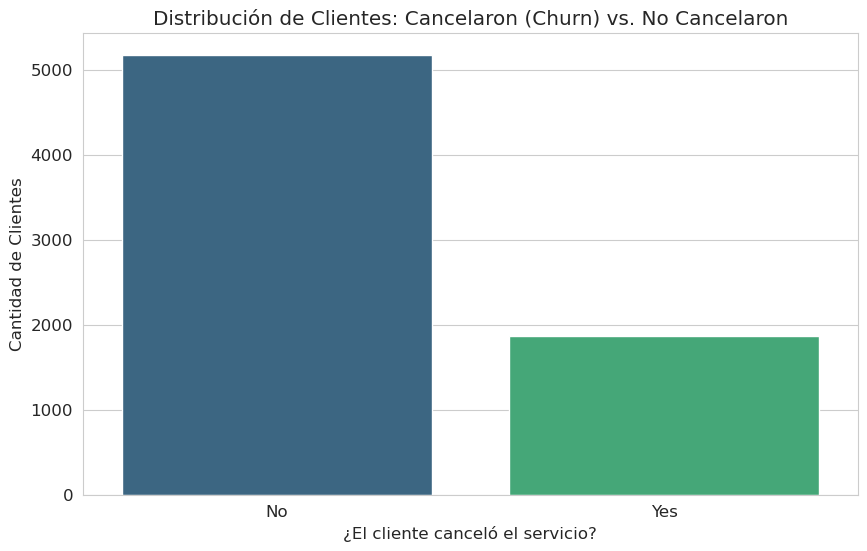

In [6]:
# Mostramos la distribución de la variable 'Churn'
print("Distribución de la variable 'Churn':")
print(df['Churn'].value_counts())
print("\nPorcentaje de la distribución:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Visualizamos la distribución. Gracias a nuestra configuración inicial, el gráfico se verá profesional.
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de Clientes: Cancelaron (Churn) vs. No Cancelaron')
plt.xlabel('¿El cliente canceló el servicio?')
plt.ylabel('Cantidad de Clientes')
plt.show()

***Observaciones de las inspecciones iniciales*** <br>

**Estructura:** El dataset contiene 7,043 filas y 21 columnas.

**Nombres y Formatos:** Las columnas usan CamelCase y los valores categóricos están en formato de título (ej. 'Yes').

**Tipo de Dato Incorrecto:** La columna TotalCharges se lee como object en lugar de float, lo que indica la presencia de valores no numéricos.

**Desbalance de Clases:** Nuestra variable objetivo Churn está desbalanceada. Aproximadamente el 26.5% de los clientes cancelaron. Esto es crucial para la fase de modelado y evaluación.

### ***limpieza y Preparacion de datos***

In [7]:
# 2.1 Creación de una Copia y Estandarización
# df = df.copy()

# Estandarizar nombres de columnas (minúsculas y '_')
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Estandarizar valores de texto (minúsculas y sin espacios extra)
string_columns = df.select_dtypes(include='object').columns
for col in string_columns:
    df[col] = df[col].str.strip().str.lower()

# 2.2 Corrección de Tipos de Datos
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

# 2.3 Manejo de Nulos, Duplicados y Columnas Irrelevantes
# Contamos los nulos generados por la conversión
print(f"Valores nulos generados en 'totalcharges': {df['totalcharges'].isnull().sum()}")



Valores nulos generados en 'totalcharges': 11


In [8]:
# Eliminamos las 11 filas con nulos (representan un 0.15%)
df = df.dropna(subset=['totalcharges'])

# Eliminamos la columna ID (columna irrelevante para el entrenamiento del modelo)
df = df.drop(columns=['customerid'])

# Verificamos y eliminamos duplicados
print(f"Filas antes de la última revisión de duplicados: {len(df)}")
df = df.drop_duplicates()
print(f"Filas después de la última revisión de duplicados: {len(df)}")

# 2.4 Verificación Final del Proceso de Limpieza
print("\n--- Estado Final del DataFrame Limpio ---")
print(f"Dimensiones finales del dataset: {df.shape}")
df.info()

Filas antes de la última revisión de duplicados: 7032
Filas después de la última revisión de duplicados: 7010

--- Estado Final del DataFrame Limpio ---
Dimensiones finales del dataset: (7010, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   seniorcitizen     7010 non-null   int64  
 2   partner           7010 non-null   object 
 3   dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   phoneservice      7010 non-null   object 
 6   multiplelines     7010 non-null   object 
 7   internetservice   7010 non-null   object 
 8   onlinesecurity    7010 non-null   object 
 9   onlinebackup      7010 non-null   object 
 10  deviceprotection  7010 non-null   object 
 11  techsupport       7010 non-null   object 
 12  streamingtv       7010 non-null   obje

***Resumen de la Fase de Limpieza***

El dataset ha sido depurado, resultando en 7,010 filas y 20 columnas.

Se estandarizaron todos los nombres de las columnas a formato snake_case.

Todos los valores de texto fueron convertidos a forma snake_case.

La columna totalcharges fue convertida correctamente al tipo de dato numérico (float64).

Se eliminaron 11 filas que contenían valores nulos y 22 filas que resultaron ser duplicados después de quitar el customerid.

El DataFrame final no contiene valores nulos ni duplicados.

El conjunto de datos está ahora limpio, consistente y listo para la siguiente fase: Análisis Exploratorio de Datos (EDA).

### ***EDA***

**Análisis Univariado:** Entender cada variable de forma individual.

**Análisis Bivariado:** Relacionar cada variable con nuestro objetivo, churn, para encontrar los factores más influyentes.

**Análisis Univariado: Entendiendo Nuestras Variables**<br>
Primero, vamos a analizar la distribución de nuestras variables numéricas y la frecuencia de las categóricas.

In [9]:
# Obtenemos y mostramos el resumen estadístico
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


**Observaciones**<br>
**count:** Todas las variables numéricas tienen 7,010 registros, confirmando que no hay valores nulos.

**seniorcitizen:** Al ser una variable binaria (0 o 1), la media (mean) de 0.16 nos dice que aproximadamente el 16% de nuestros clientes son "Senior Citizens". El min es 0 y el max es 1, como es de esperar.

**tenure vs. totalcharges:** La desviación estándar (std) es alta en ambas, indicando una gran dispersión de los datos. La diferencia entre la media y la mediana (50%) en totalcharges confirma el sesgo a la derecha

In [10]:
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'churn']
all_numeric_cols = df.select_dtypes(include=np.number).columns

# 2. Separamos las numéricas en continuas y binarias
continuous_cols = [col for col in all_numeric_cols if df[col].nunique() > 2]
binary_cols = [col for col in all_numeric_cols if df[col].nunique() == 2]

### **Variables numericas (Univaridas)**

/tmp/ipykernel_14863/3808712230.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=binary_cols[0], data=df, ax=ax[3], palette='viridis')
/tmp/ipykernel_14863/3808712230.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(['No', 'Sí'])


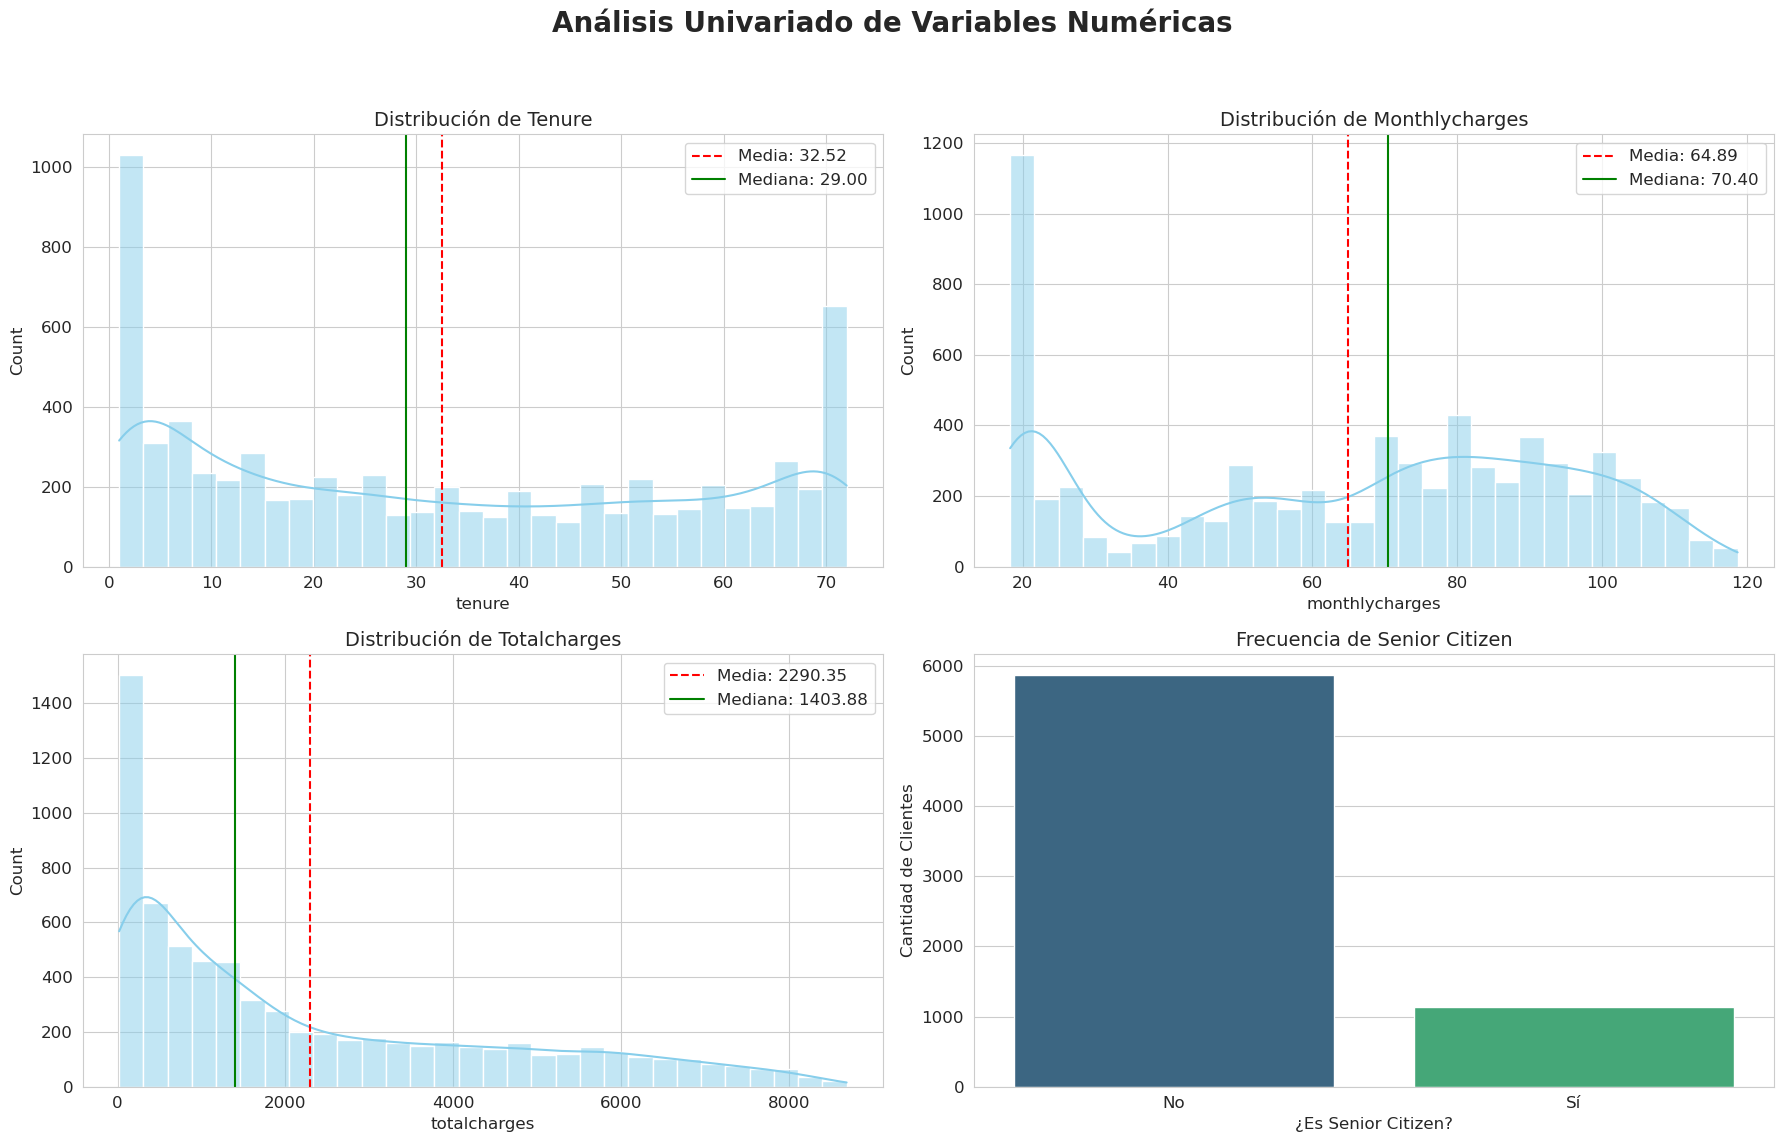

In [11]:
# --- Figura Consolidada para el Análisis Univariado Numérico ---

# Creamos una cuadrícula de 2x2 para poner nuestros 4 gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Análisis Univariado de Variables Numéricas', fontsize=20, fontweight='bold')

# Aplanamos el array de ejes para poder iterar fácilmente (ax[0], ax[1], etc.)
ax = ax.flatten()

# --- Gráficos para Variables Continuas ---
for i, col in enumerate(continuous_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=ax[i], color='skyblue')
    ax[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Media: {df[col].mean():.2f}')
    ax[i].axvline(df[col].median(), color='green', linestyle='-', label=f'Mediana: {df[col].median():.2f}')
    ax[i].set_title(f'Distribución de {col.capitalize()}', fontsize=14)
    ax[i].legend()

# --- Gráfico para Variables Binarias ---
# Usamos el siguiente eje disponible (el índice 3) para el gráfico de 'seniorcitizen'
sns.countplot(x=binary_cols[0], data=df, ax=ax[3], palette='viridis')
ax[3].set_title('Frecuencia de Senior Citizen', fontsize=14)
ax[3].set_xlabel('¿Es Senior Citizen?')
ax[3].set_xticklabels(['No', 'Sí'])
ax[3].set_ylabel('Cantidad de Clientes')


# Ajustamos el layout para que no se superpongan los títulos y lo mostramos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

***Variables Numéricas*** <br>
**tenure (Antigüedad):** La distribución es bimodal, con una gran concentración de clientes muy nuevos (menos de 10 meses) y otro grupo grande de clientes muy leales (más de 60 meses). Esto sugiere que la fase inicial es crítica para la retención.

**monthlycharges (Cargos Mensuales):** La mayoría de los clientes se agrupan en la franja de cargos bajos (alrededor de 20-30 USD), probablemente correspondiendo a planes básicos sin servicios adicionales.

**seniorcitizen (Cliente Mayor):** Es una variable minoritaria. Solo un 16% de los clientes son considerados "Senior Citizens", mientras que el 84% no lo son.

### **Variables categoricas (Univariadas)**

/tmp/ipykernel_14863/3674034029.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax[i], palette='rocket')
/tmp/ipykernel_14863/3674034029.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax[i], palette='rocket')
/tmp/ipykernel_14863/3674034029.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax[i], palette='rocket')
/tmp/ipykernel_14863/3674034029.py:13: FutureW

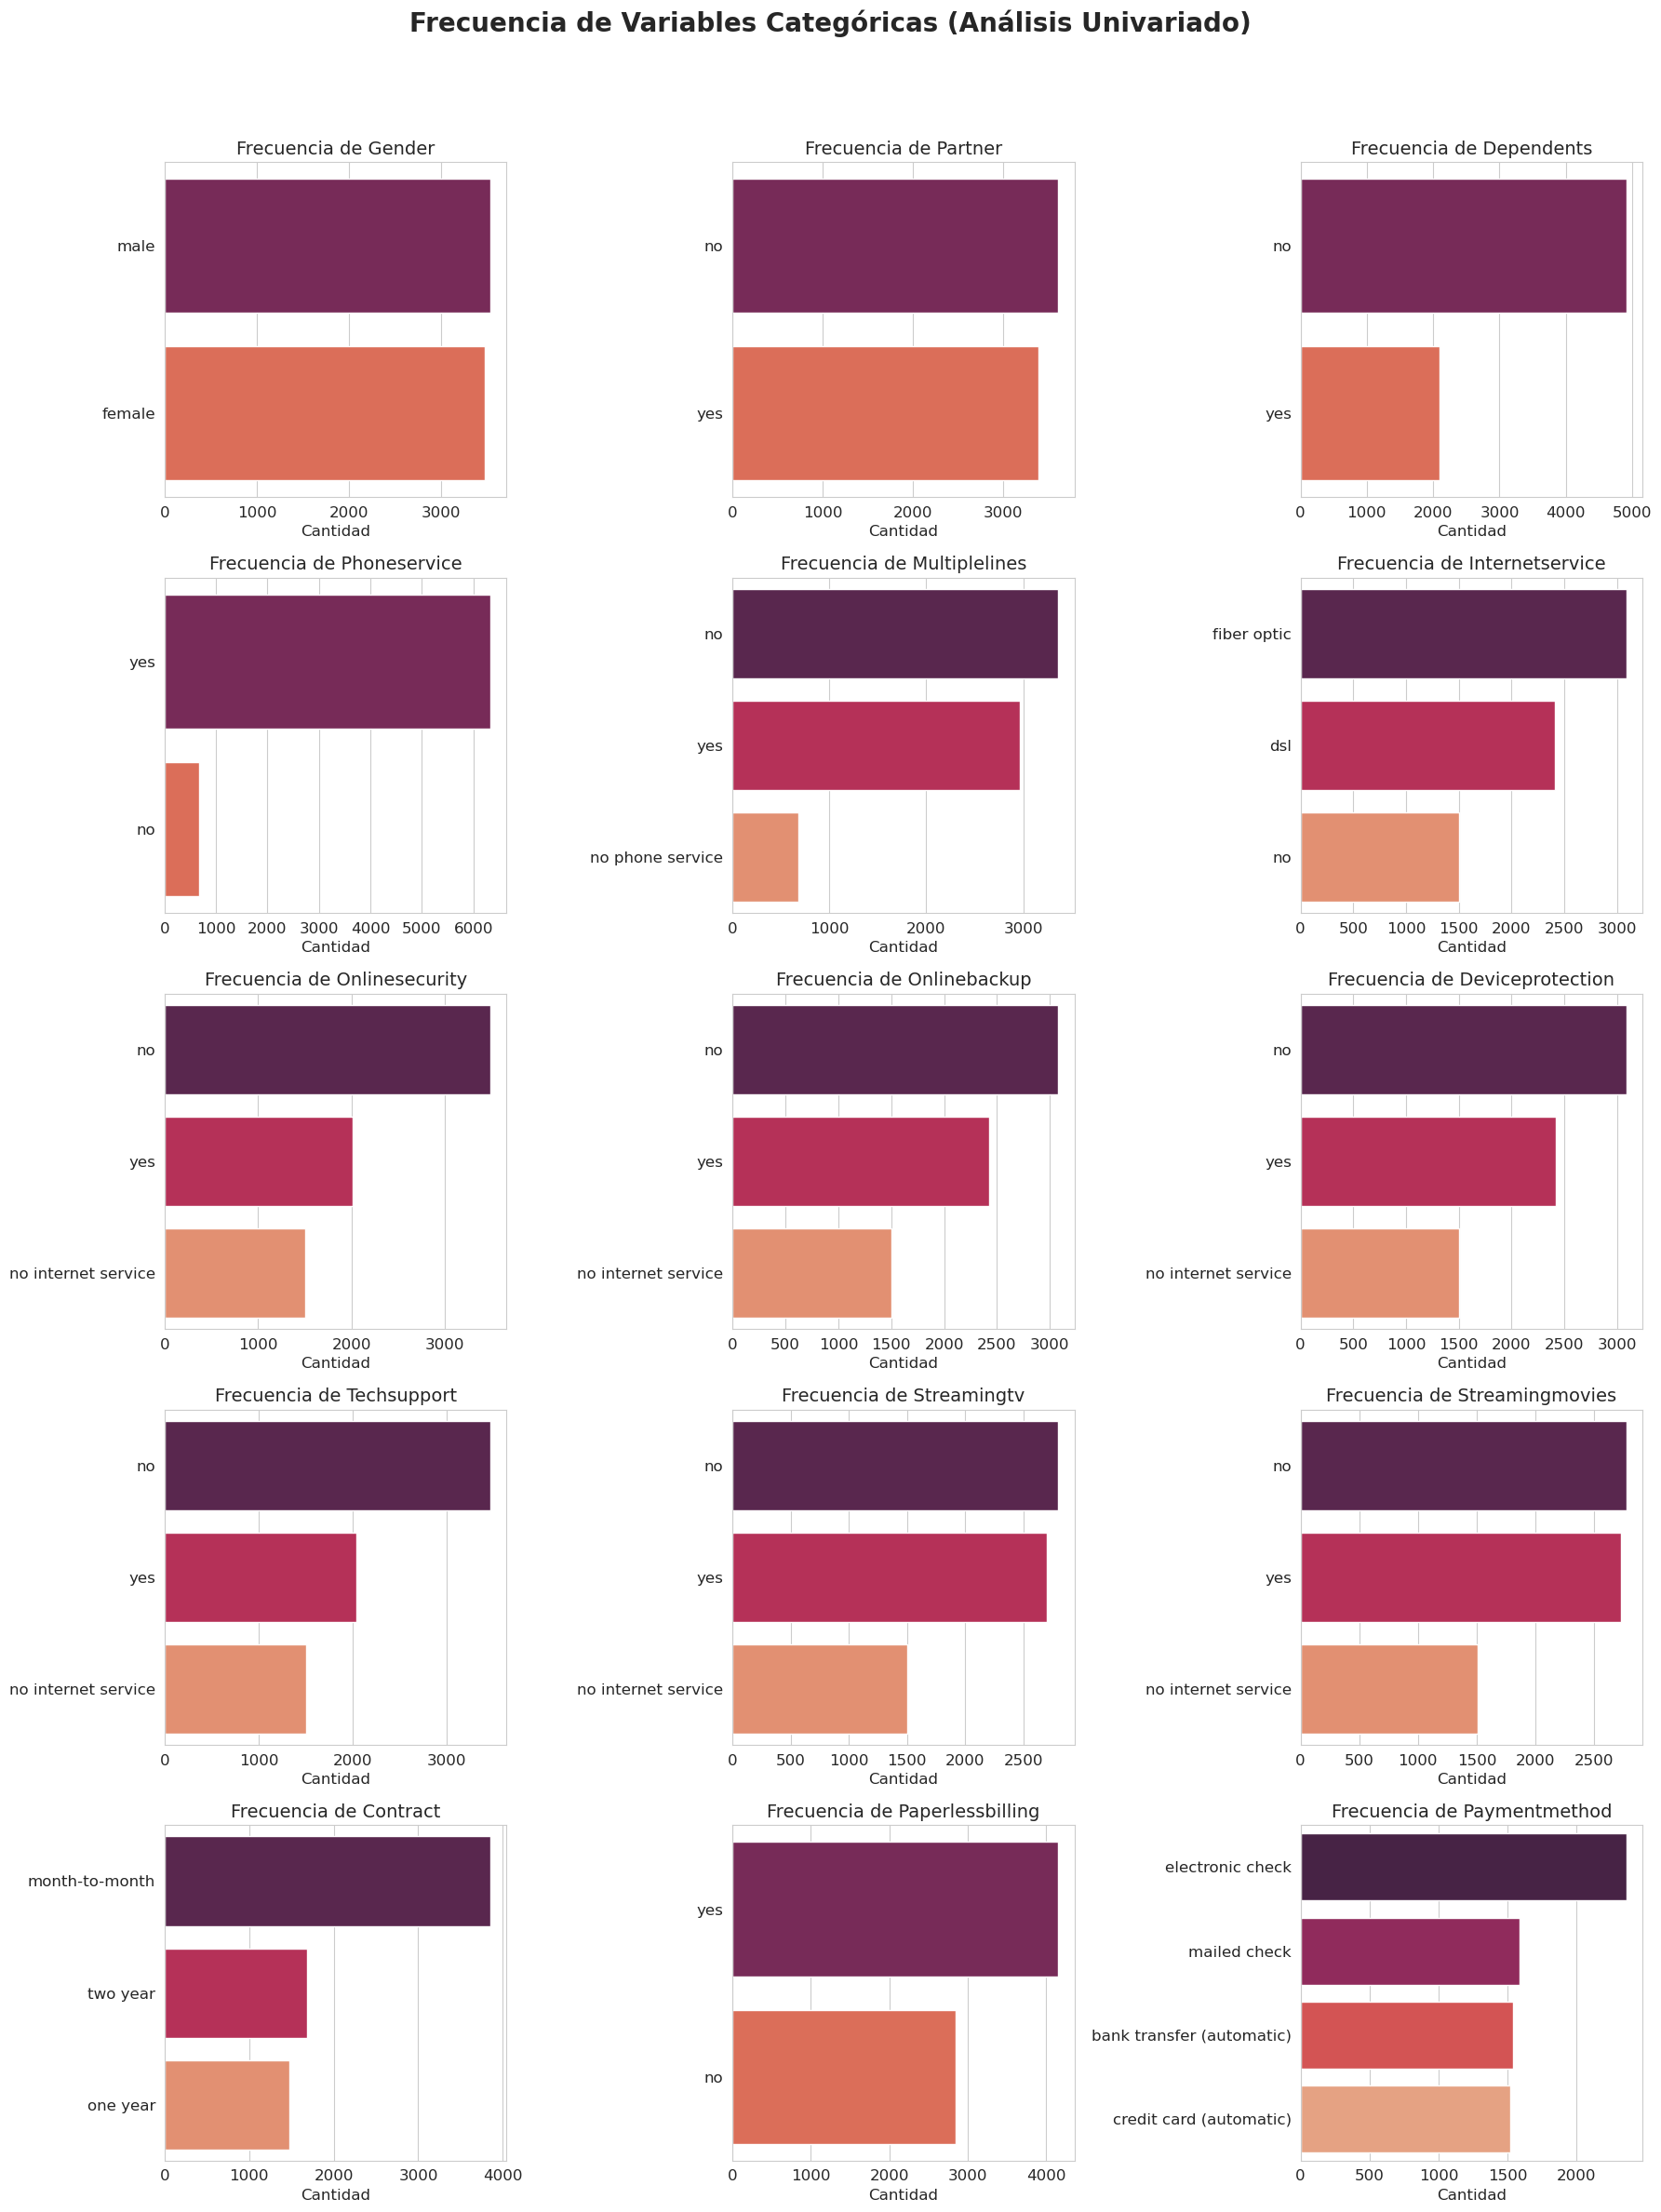

In [12]:
# --- Figura Consolidada para el Análisis Univariado Categórico ---

# Calculamos dinámicamente el tamaño de la cuadrícula
n_cols = 3
n_rows = (len(categorical_cols) - 1) // n_cols + 1

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 5))
fig.suptitle('Frecuencia de Variables Categóricas (Análisis Univariado)', fontsize=20, fontweight='bold')
ax = ax.flatten()

# Creamos un gráfico de conteo para cada variable categórica
for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax[i], palette='rocket')
    ax[i].set_title(f'Frecuencia de {col.capitalize()}', fontsize=14)
    ax[i].set_xlabel('Cantidad')
    ax[i].set_ylabel('')

# Ocultamos los ejes que no se usen (si el número de gráficos no es múltiplo de 3)
for i in range(len(categorical_cols), len(ax)):
    ax[i].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Variables Categóricas** <br>
**Servicios de Internet:** La mayoría de los clientes tienen servicio de internet, siendo la Fibra Óptica ligeramente más popular que el DSL. Un número considerable de clientes no tiene internet.

**Contratos:** La modalidad de contrato Mes a Mes (month-to-month) es la más común, superando ampliamente a los contratos de uno y dos años.

**Servicios Adicionales:** La mayoría de los clientes no tienen servicios de valor agregado como onlinesecurity, techsupport o onlinebackup.

### **Análisis Bivariado: Buscando los Impulsores del Churn**<br>
Este es el núcleo de nuestro EDA. ¿Qué características distinguen a los clientes que se van de los que se quedan?

### **Variables numericas (bivariadas)**

/tmp/ipykernel_14863/1037947645.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn'] == 'no'][col], label='No Churn', ax=ax[i], color='blue', shade=True)
/tmp/ipykernel_14863/1037947645.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn'] == 'yes'][col], label='Churn', ax=ax[i], color='red', shade=True)
/tmp/ipykernel_14863/1037947645.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['churn'] == 'no'][col], label='No Churn', ax=ax[i], color='blue', shade=True)
/tmp/ipykernel_14863/1037947645.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
T

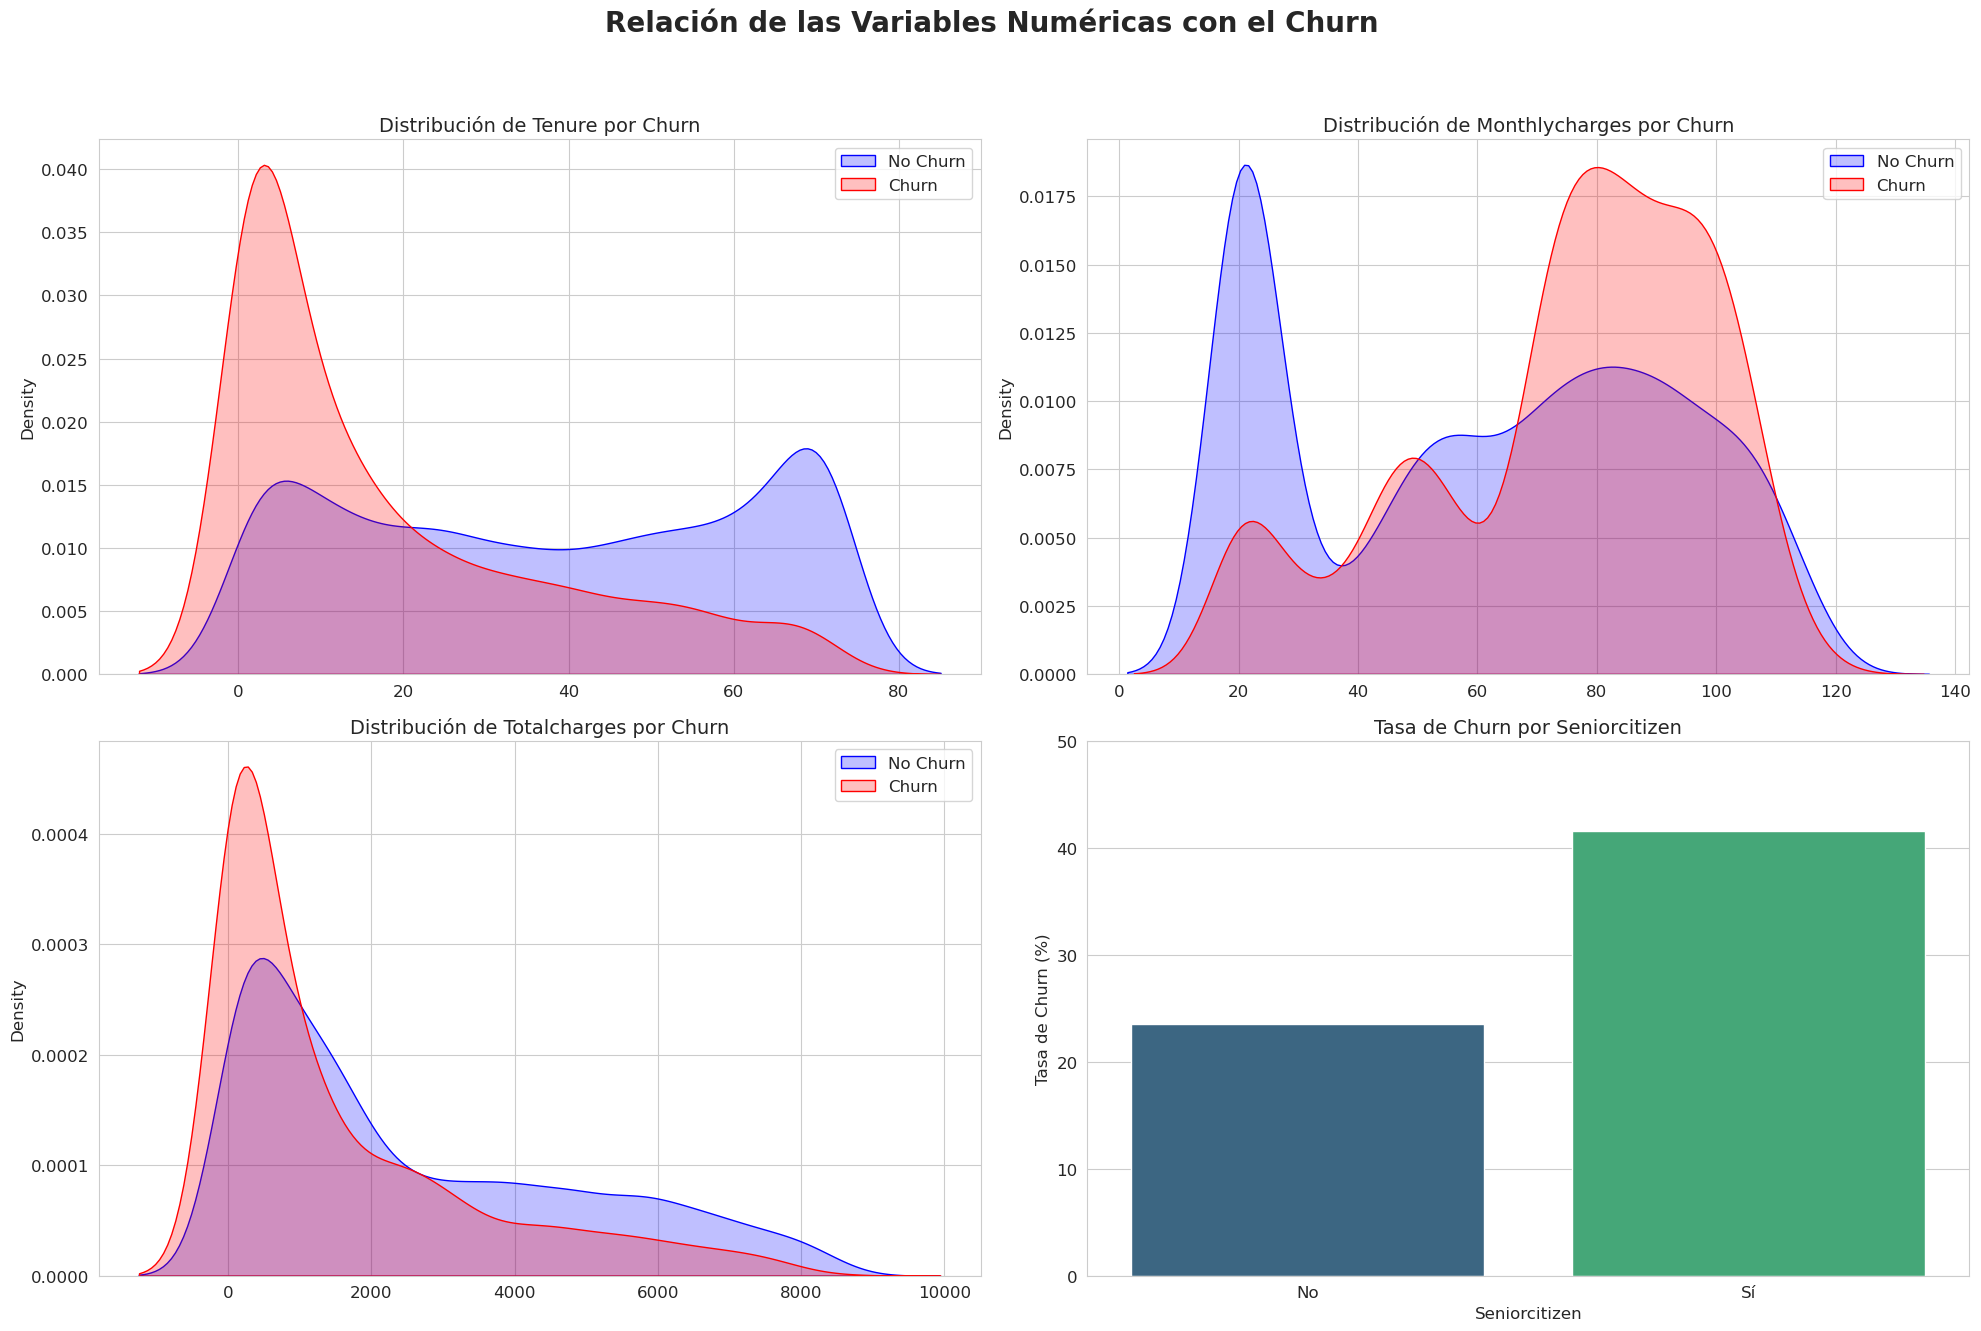

In [13]:
# --- Figura Consolidada para el Análisis Bivariado Numérico ---

# Preparamos una figura 2x2 para nuestros 4 gráficos numéricos
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
fig.suptitle('Relación de las Variables Numéricas con el Churn', fontsize=20, fontweight='bold')
ax = ax.flatten()

# --- 1. Gráficos de Densidad para Variables Continuas vs. Churn ---
for i, col in enumerate(continuous_cols):
    sns.kdeplot(df[df['churn'] == 'no'][col], label='No Churn', ax=ax[i], color='blue', shade=True)
    sns.kdeplot(df[df['churn'] == 'yes'][col], label='Churn', ax=ax[i], color='red', shade=True)
    ax[i].set_title(f'Distribución de {col.capitalize()} por Churn', fontsize=14)
    ax[i].legend()
    ax[i].set_xlabel('') # Limpiamos la etiqueta X para mayor claridad

# --- 2. Gráfico de Tasa de Churn para Variables Binarias vs. Churn ---
# Usamos el método limpio "al vuelo" sin modificar el DataFrame
churn_rate_senior = (df['churn'] == 'yes').groupby(df[binary_cols[0]]).mean() * 100

sns.barplot(x=churn_rate_senior.index, y=churn_rate_senior.values, ax=ax[3], palette='viridis')
ax[3].set_title(f'Tasa de Churn por {binary_cols[0].capitalize()}', fontsize=14)
ax[3].set_ylabel('Tasa de Churn (%)')
ax[3].set_xlabel(binary_cols[0].capitalize())
ax[3].set_xticklabels(['No', 'Sí'])
ax[3].set_ylim(0, 50)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Variables Numéricas vs. Churn** <br>
**tenure:** Es el predictor más fuerte. La tasa de churn es extremadamente alta en clientes con baja antigüedad y disminuye drásticamente a medida que aumenta la lealtad.

**monthlycharges:** Los clientes que cancelan (Churn) tienden a tener cargos mensuales más altos. Esto es especialmente visible en el rango de 70-100 USD, que suele corresponder a planes de Fibra Óptica.

**seniorcitizen:** Ser un "Senior Citizen" es un factor de riesgo significativo. Su tasa de churn es de casi el 42%, casi el doble que la de los clientes más jóvenes (23%).

### ***Variables categoricas (bivariadas)***

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


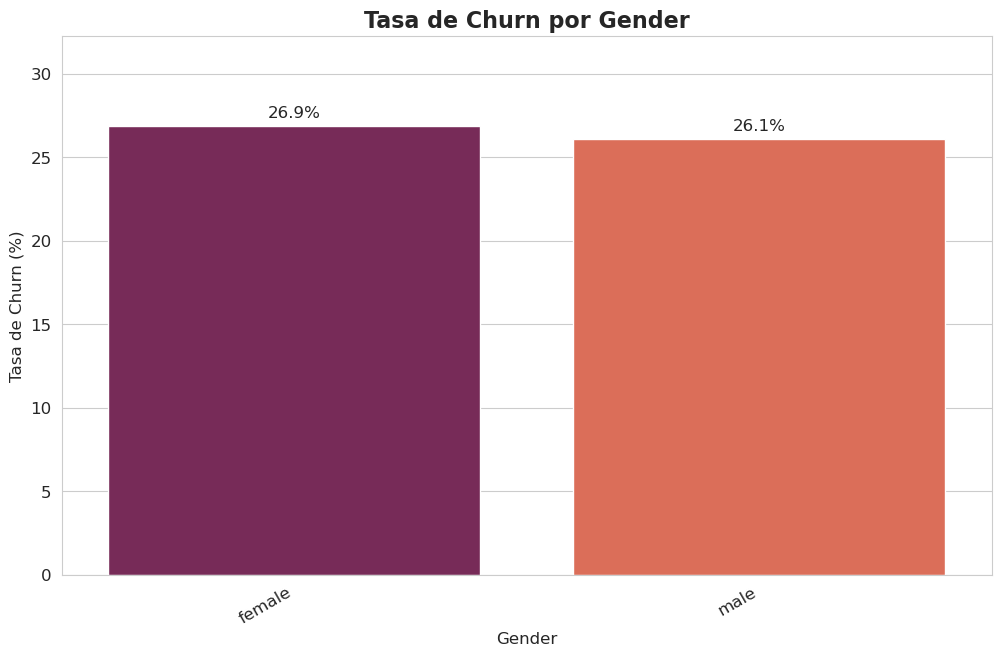

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


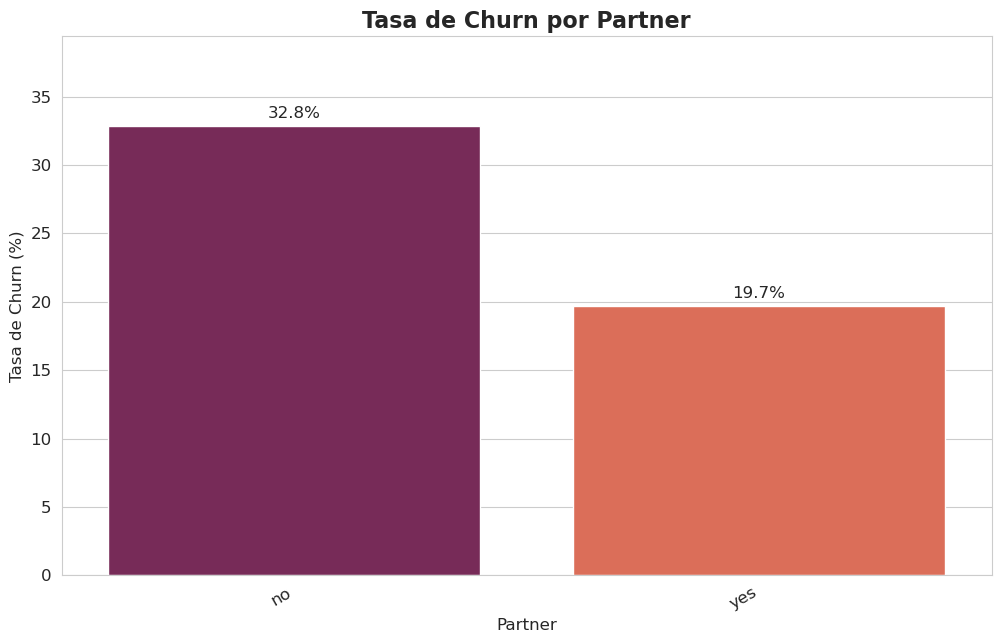

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


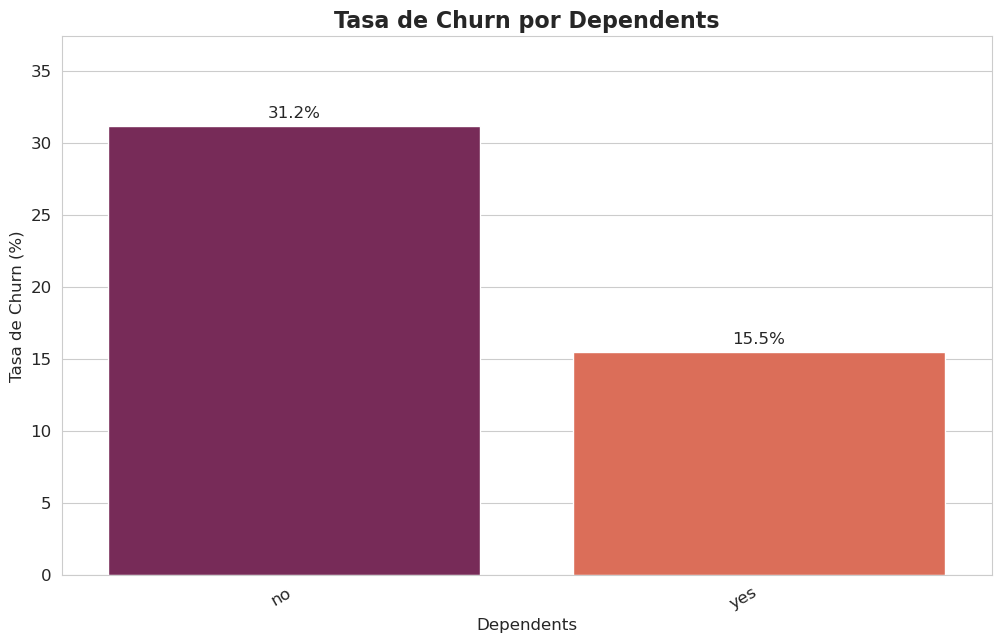

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


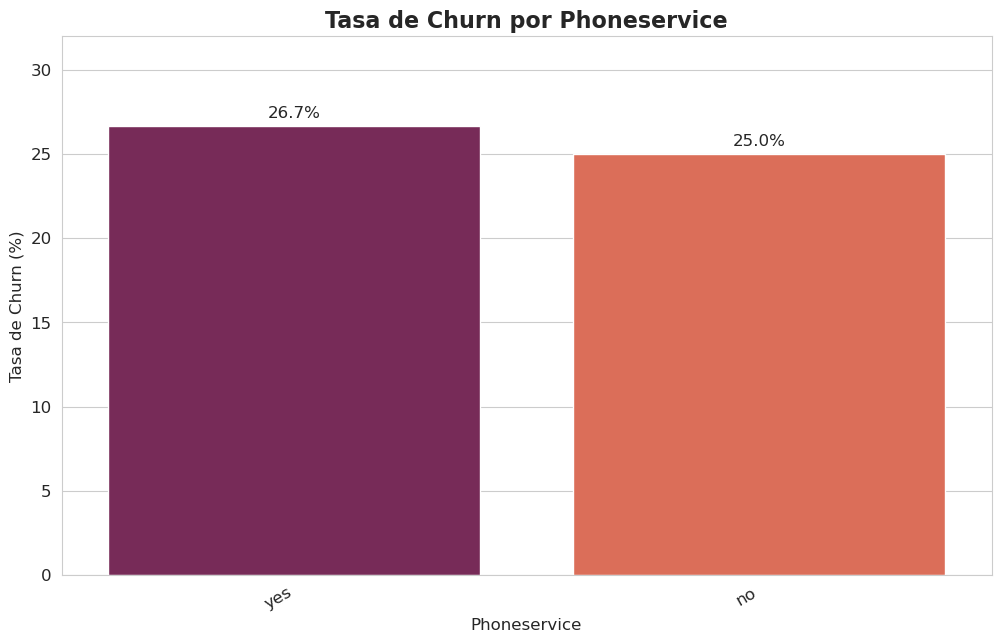

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


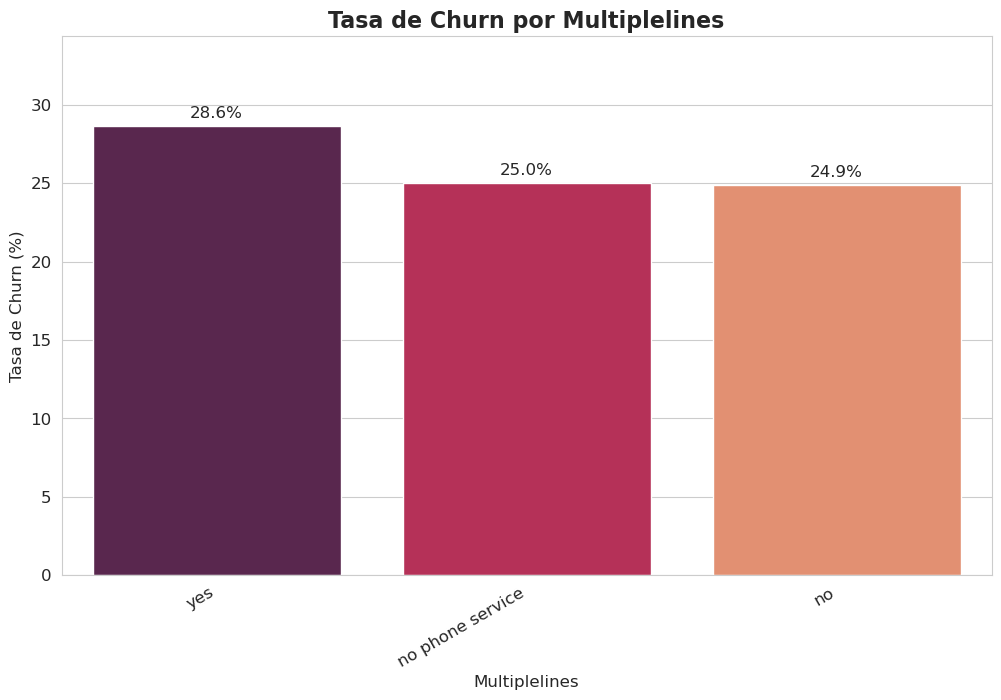

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


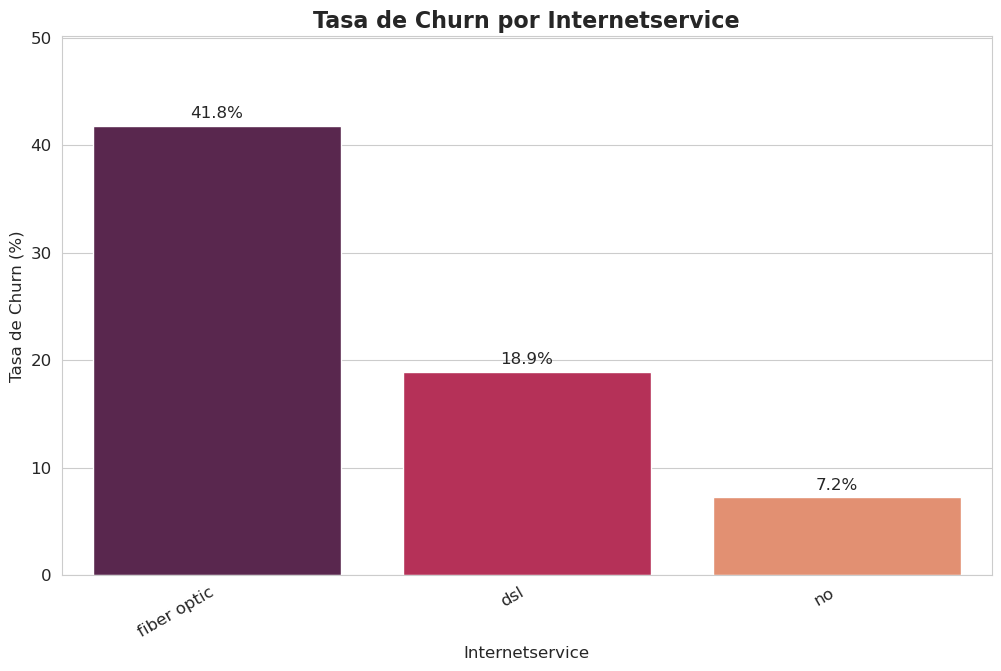

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


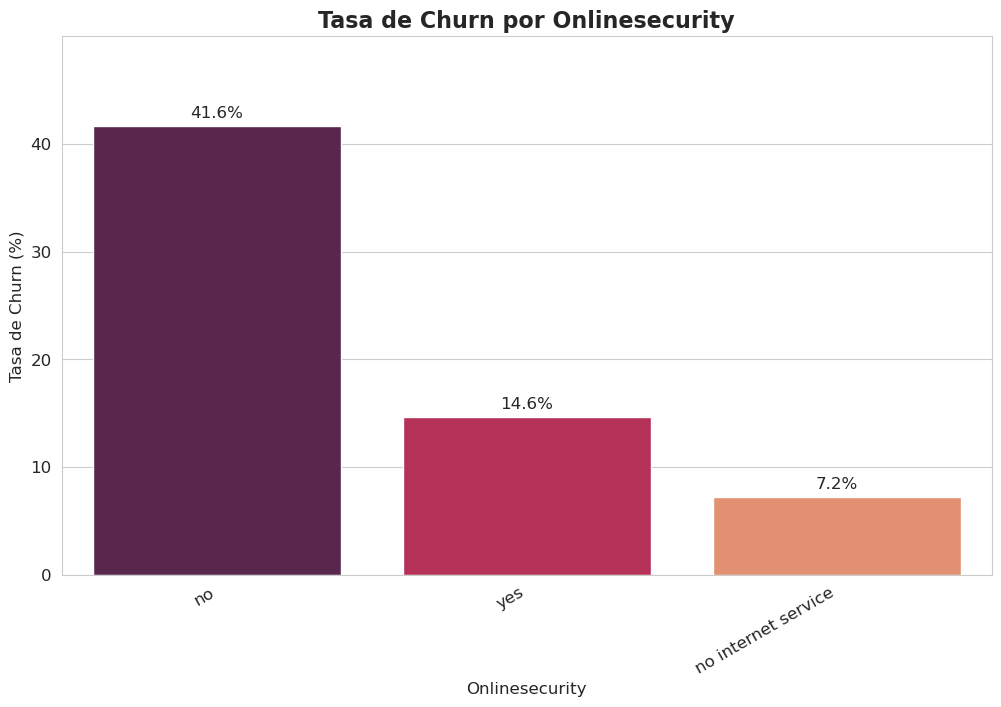

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


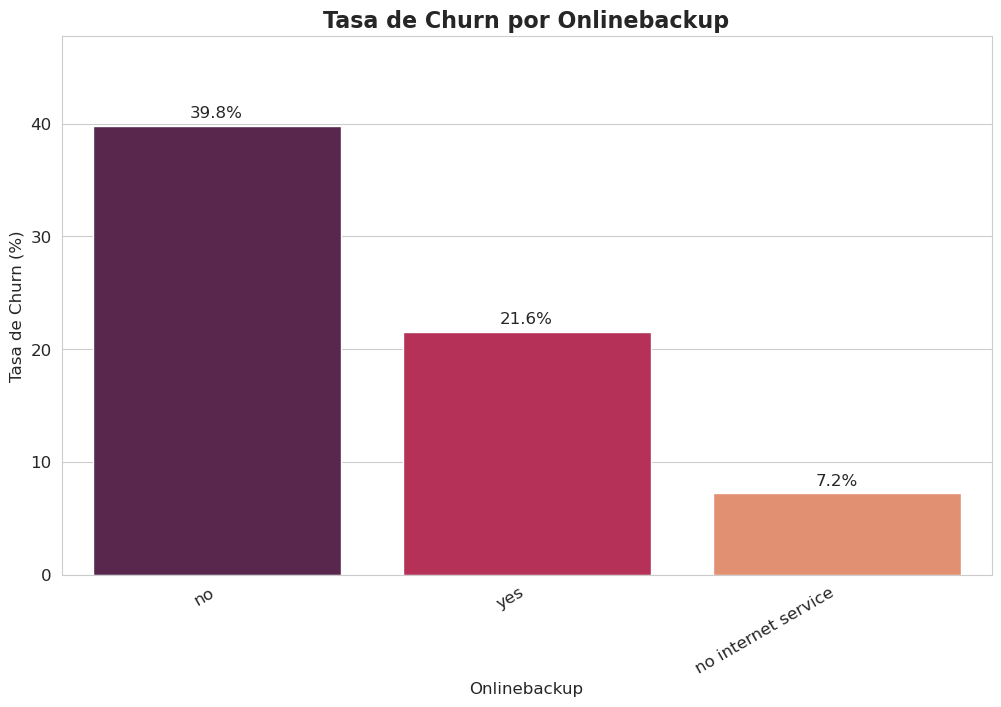

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


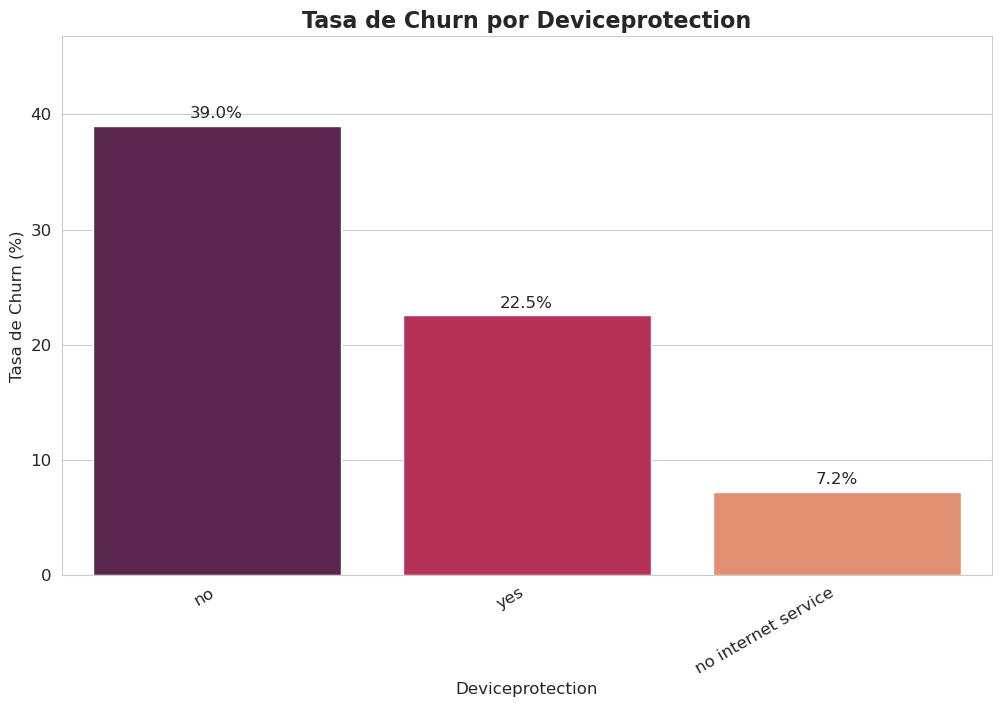

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


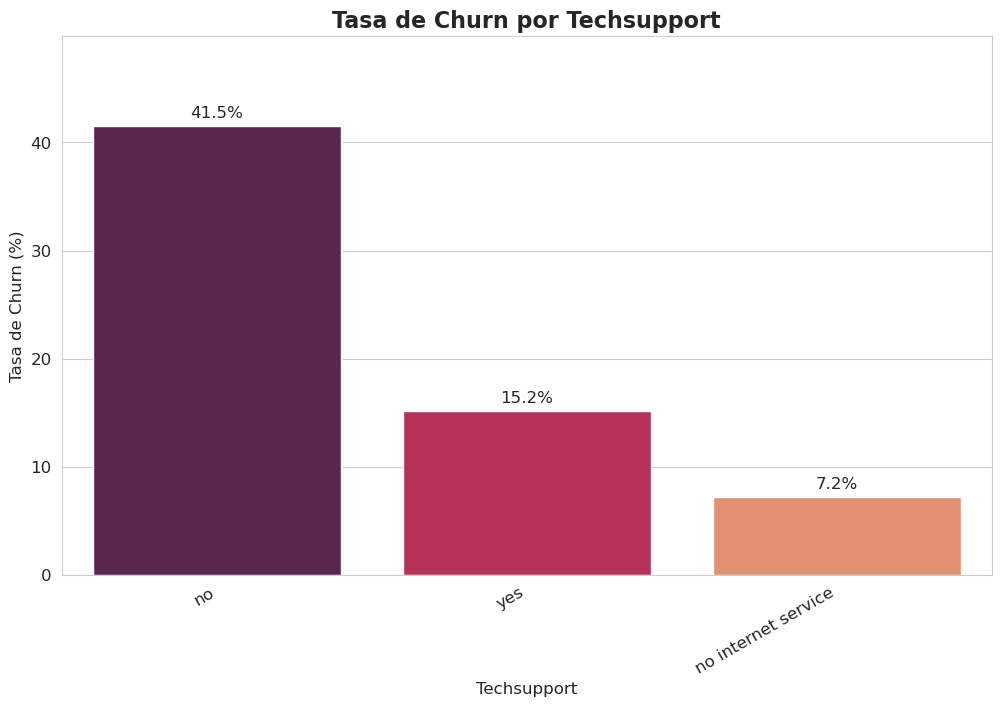

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


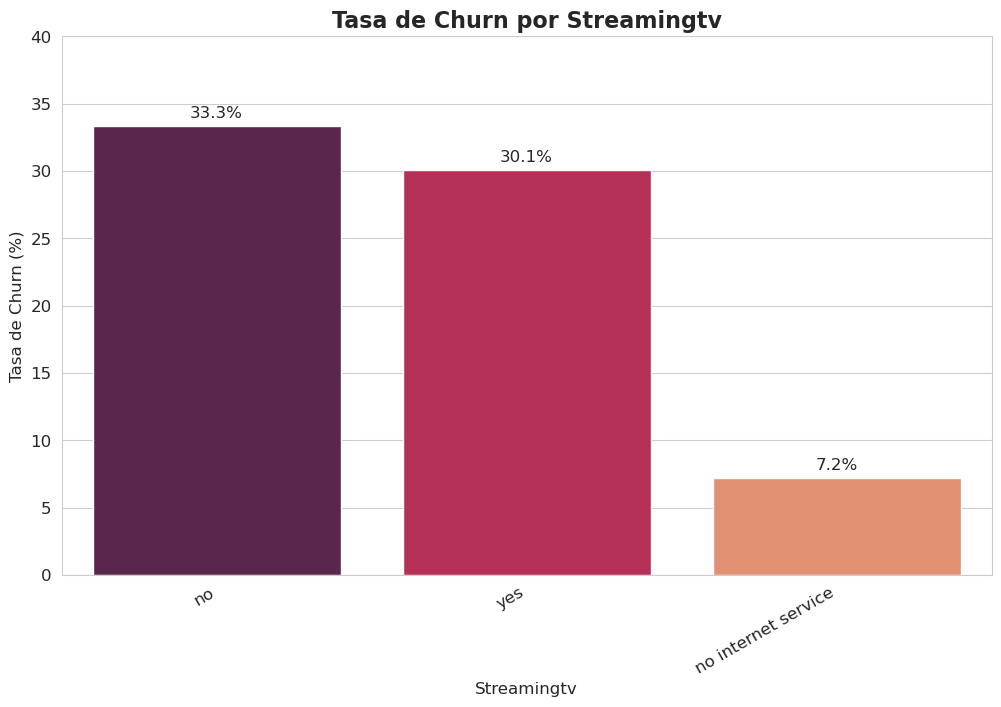

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


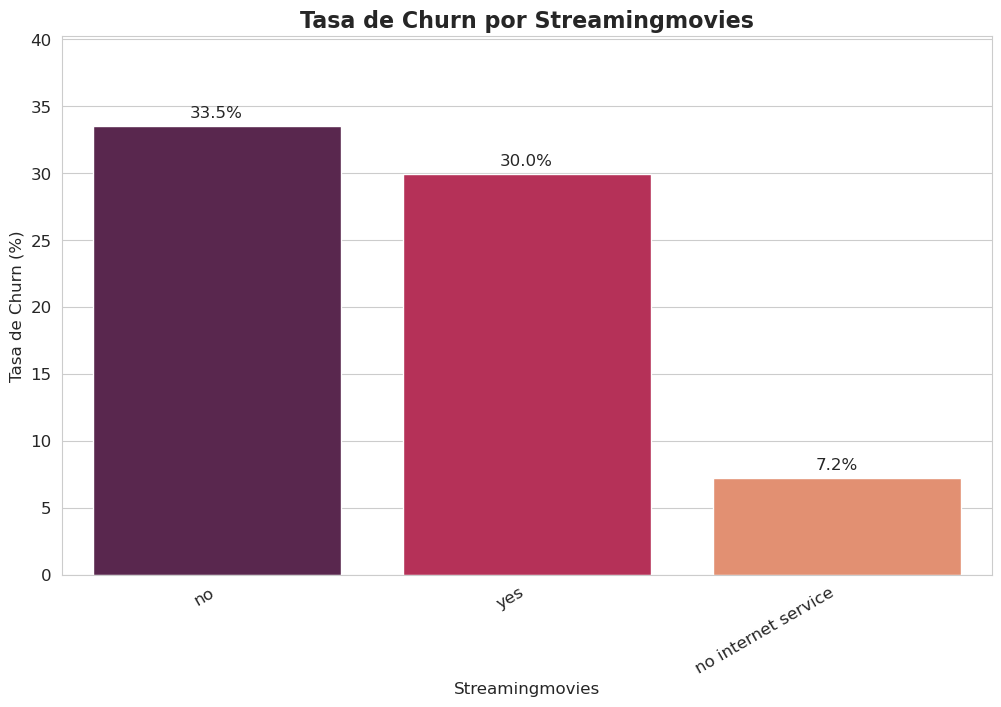

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


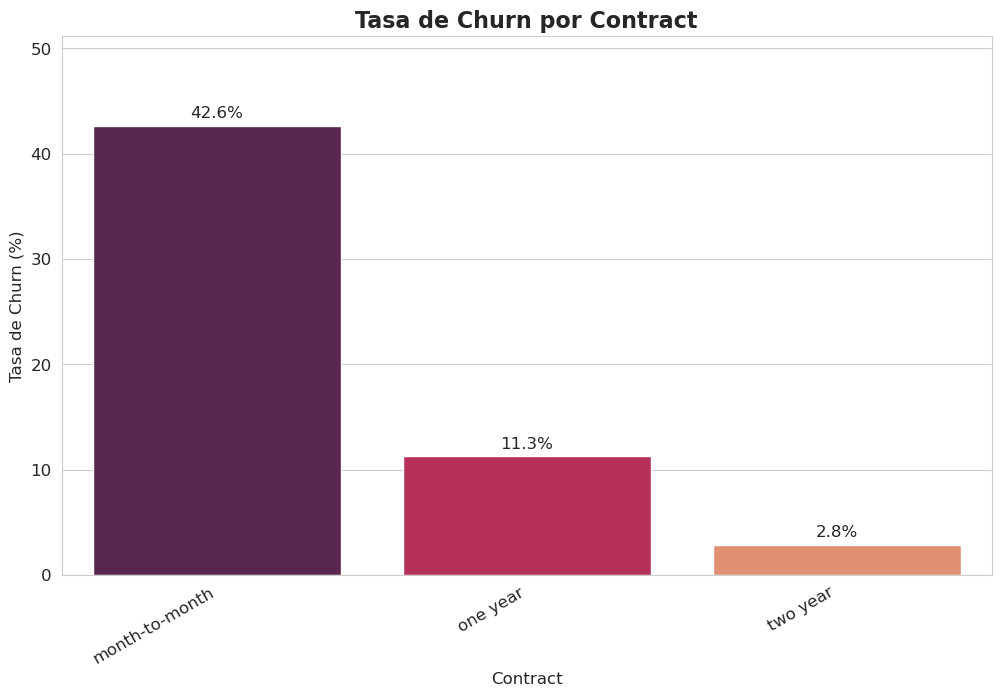

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


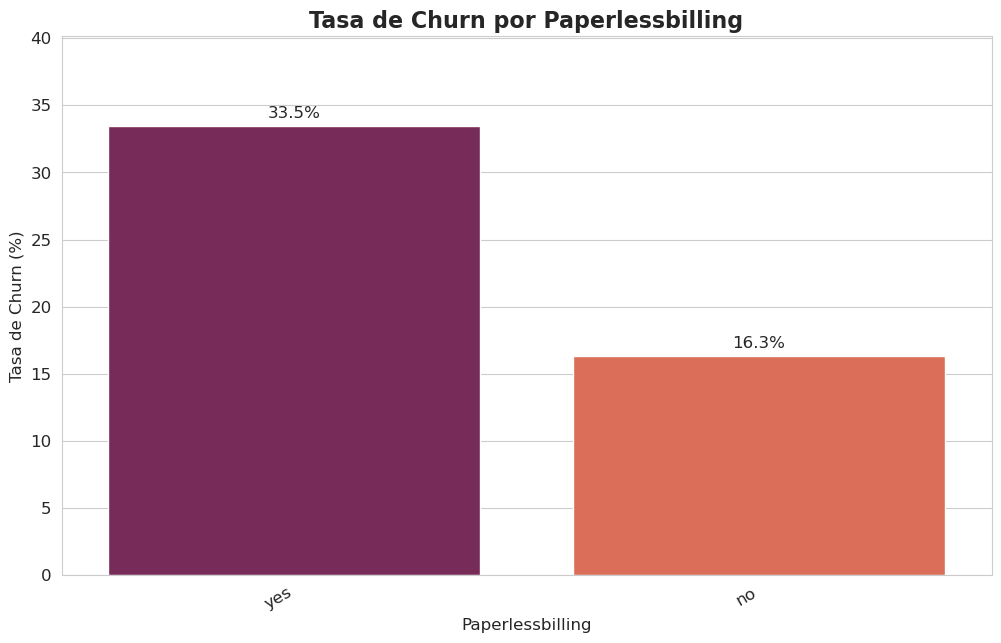

/tmp/ipykernel_14863/3548000021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')


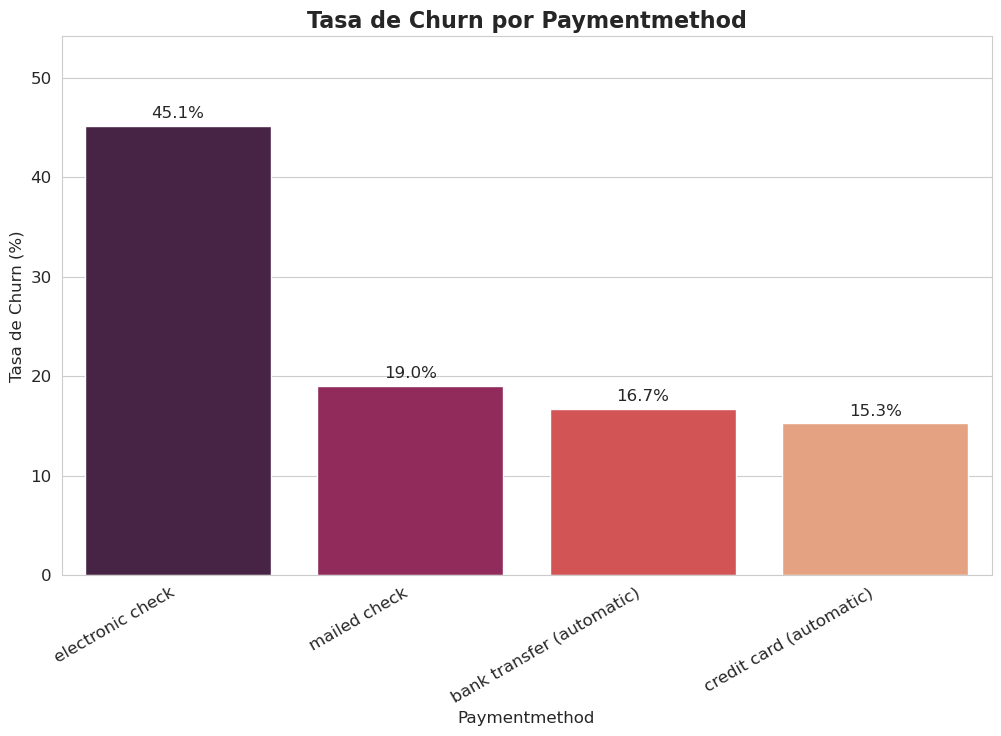

In [14]:
# --- 1. Creación de una Función Profesional para el Análisis ---
def plot_churn_rate_by_category(column_name):
    """
    Calcula y grafica la tasa de churn para cada categoría de una columna dada.
    """
    # Calculamos la tasa de churn por categoría
    churn_rate = (df['churn'] == 'yes').groupby(df[column_name]).mean().sort_values(ascending=False) * 100
    
    # Creamos el gráfico de barras
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='rocket')
    
    # Añadimos el porcentaje sobre cada barra para mayor claridad
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

    plt.title(f'Tasa de Churn por {column_name.capitalize()}', fontsize=16, fontweight='bold')
    plt.ylabel('Tasa de Churn (%)', fontsize=12)
    plt.xlabel(column_name.capitalize(), fontsize=12)
    plt.xticks(rotation=30, ha='right')
    plt.ylim(0, churn_rate.max() * 1.2) # Ajustamos el límite Y para dar espacio a las etiquetas
    plt.show()

# --- 2. Aplicación de la Función a Nuestras Variables Categóricas ---
# Ahora simplemente llamamos a la función para cada columna que queremos analizar.
# 'categorical_cols' es la lista que creamos en la fase de preparación.
for col in categorical_cols:
    plot_churn_rate_by_category(col)

***Variables Categóricas vs. Churn***<br>

**contract:** Es el predictor categórico más importante. Los clientes con contrato Mes a Mes tienen una tasa de churn altísima (>40%), mientras que los de contrato de Dos Años son los más leales (tasa de churn <3%).

**internetservice:** Los clientes con Fibra Óptica tienen una tasa de churn mucho más alta que los de DSL. Esto, combinado con los cargos mensuales, sugiere que los planes de fibra, aunque populares, pueden tener problemas de precio o estabilidad que causan la fuga.

**Factores de Retención:** Los clientes que contratan servicios como onlinesecurity y techsupport tienen tasas de churn significativamente más bajas. Esto indica que estos servicios de soporte y seguridad son efectivos para retener clientes.

**Variables de Bajo Impacto:** gender y phoneservice muestran un impacto casi nulo en la tasa de churn, siendo prácticamente la misma para todas sus categorías.

### ***Preprocesamiento para el Modelo (Feature Engineering)***

In [15]:
# 'X' contendrá todas las columnas excepto 'churn'
X = df.drop('churn', axis=1)

# 'y' contendrá únicamente la columna 'churn'
y = df['churn']

# Verificamos las dimensiones
print("Dimensiones de X (características):", X.shape)
print("Dimensiones de y (objetivo):", y.shape)

Dimensiones de X (características): (7010, 19)
Dimensiones de y (objetivo): (7010,)


***División de Datos: Entrenamiento y Prueba (Train-Test Split)***<br>
Este es el paso más importante antes de entrenar un modelo. Dividimos nuestros datos en dos conjuntos:

**Conjunto de Entrenamiento (Training set):** La mayor parte de los datos (usualmente 70-80%). El modelo "aprenderá" de estos datos.

**Conjunto de Prueba (Test set):** El resto de los datos (20-30%). El modelo nunca verá estos datos durante el entrenamiento. Los usaremos al final para evaluar qué tan bien generaliza nuestro modelo a datos nuevos y desconocidos.

*¿Por qué lo hacemos ahora?* Para evitar la "fuga de datos" (data leakage). Cualquier cálculo o ajuste que hagamos (como el escalado) debe aprenderse solo de los datos de entrenamiento para no contaminar la evaluación.

In [16]:
# Dividimos los datos: 80% para entrenamiento, 20% para prueba
# 'stratify=y' es importante para asegurar que la proporción de 'churn'
# sea la misma en ambos conjuntos, dada la naturaleza desbalanceada de nuestros datos.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=semilla, 
    stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (5608, 19)
Tamaño del conjunto de prueba: (1402, 19)


***Procesamiento de la Variable Objetivo (y)***
Este es el paso que faltaba y que debe ir aquí. Antes de tocar X, nos aseguramos de que nuestras etiquetas y estén en formato numérico.

In [17]:
# Convertimos los valores de 'y' a 0s y 1s
y_train = y_train.apply(lambda x: 1 if x == 'yes' else 0)
y_test = y_test.apply(lambda x: 1 if x == 'yes' else 0)

print("Valores únicos en y_train después de la conversión:", y_train.unique())

Valores únicos en y_train después de la conversión: [0 1]


***Creación de Pipelines de Preprocesamiento***<br>
La forma más profesional de manejar el preprocesamiento es usando Pipelines y ColumnTransformer de Scikit-Learn. Esto nos permite definir una serie de pasos que se aplicarán de forma consistente a nuestros datos.

***Trataremos las variables numéricas y categóricas de forma diferente:***

**Variables Numéricas:** Las escalaremos. Algoritmos como la Regresión Logística son sensibles a la escala de las variables. Queremos que todas tengan una importancia similar al principio. Usaremos StandardScaler.

**Variables Categóricas:** Las codificaremos. Convertiremos cada categoría de texto en una nueva columna numérica (0 o 1). Usaremos OneHotEncoder.

In [18]:
# Re-identificamos nuestras listas de columnas desde el DataFrame X
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# 1. Pipeline para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Pipeline para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Combinamos los pipelines con ColumnTransformer
# Esto aplicará el transformador correcto a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantiene las columnas no especificadas (si las hubiera)
)

print("✅ Preprocesador creado exitosamente.")

✅ Preprocesador creado exitosamente.


***Aplicación del Preprocesador*** <br>
Ahora vamos a ejecutar el "plan de acción" que creamos con ColumnTransformer. Usaremos el método .fit_transform() en los datos de entrenamiento y .transform() en los de prueba, como discutimos.

**.fit_transform() en X_train:** Aprenderá los parámetros de escalado y las categorías de los datos de entrenamiento y, a la vez, los transformará en una matriz numérica.

**.transform() en X_test:** Usará los parámetros ya aprendidos de X_train para transformar los datos de prueba, sin volver a aprender nada.

In [19]:
# 1. APRENDER y TRANSFORMAR los datos de ENTRENAMIENTO
# El preprocesador 'aprende' los parámetros (media, categorías, etc.) de X_train y lo transforma.
X_train_preprocessed = preprocessor.fit_transform(X_train)

# 2. SOLO TRANSFORMAR los datos de PRUEBA
# Se aplican los mismos parámetros aprendidos de X_train para transformar X_test.
X_test_preprocessed = preprocessor.transform(X_test)

# 3. Verificamos la forma de los nuevos datos
# Nota: El número de columnas aumenta por el OneHotEncoding de las variables categóricas.
print("Dimensiones de X_train preprocesado:", X_train_preprocessed.shape)
print("Dimensiones de X_test preprocesado:", X_test_preprocessed.shape)

Dimensiones de X_train preprocesado: (5608, 45)
Dimensiones de X_test preprocesado: (1402, 45)


In [ ]:
# Necesitarás instalar la librería imblearn si no la tienes:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# 1. Inicializamos SMOTE
# random_state es para que el resultado sea reproducible
smote = SMOTE(random_state=42)

# 2. Aplicamos SMOTE SOLO a los datos de entrenamiento ya preprocesados
print("Balanceando el conjunto de entrenamiento con SMOTE...")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# 3. Verificamos el resultado
print("\n--- Antes de SMOTE ---")
print("Dimensiones de X_train:", X_train_preprocessed.shape)
print("Distribución de clases en y_train:\n", pd.Series(y_train).value_counts())

print("\n--- Después de SMOTE ---")
print("Dimensiones de X_train remuestreado:", X_train_resampled.shape)
print("Distribución de clases en y_train remuestreado:\n", pd.Series(y_train_resampled).value_counts())

Balanceando el conjunto de entrenamiento con SMOTE...

--- Antes de SMOTE ---
Dimensiones de X_train: (5608, 45)
Distribución de clases en y_train:
 churn
0    4122
1    1486
Name: count, dtype: int64

--- Después de SMOTE ---
Dimensiones de X_train remuestreado: (8244, 45)
Distribución de clases en y_train remuestreado:
 churn
0    4122
1    4122
Name: count, dtype: int64


In [21]:
# 1. Inicializamos el modelo
log_reg = LogisticRegression(random_state=42)

# 2. Entrenamos el modelo con nuestros datos de entrenamiento balanceados
print("Entrenando el modelo de Regresión Logística...")
log_reg.fit(X_train_resampled, y_train_resampled)
print("✅ Modelo entrenado.")

# 3. Hacemos predicciones en el conjunto de prueba (que no está balanceado)
y_pred_lr = log_reg.predict(X_test_preprocessed)
y_pred_proba_lr = log_reg.predict_proba(X_test_preprocessed)[:, 1]

# 4. Evaluamos el rendimiento
print("\n--- Resultados de la Regresión Logística ---")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

Entrenando el modelo de Regresión Logística...
✅ Modelo entrenado.

--- Resultados de la Regresión Logística ---
AUC-ROC Score: 0.8567

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1031
           1       0.52      0.82      0.63       371

    accuracy                           0.75      1402
   macro avg       0.72      0.77      0.72      1402
weighted avg       0.81      0.75      0.76      1402

